In [1]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt


## Image and feature classification

In [ ]:
# Path to the folder containing character folders
dataset_path = "data/"

# Load the CSV file
feature_data = pd.read_csv('feature_list.csv')

# Lists for storing image data, labels, paths, and character names
images = []
features_list = []
image_paths = []
character_names = []

# Verify folders and map images to features
for index, row in feature_data.iterrows():
    character_name = row['character']
    character_folder = os.path.join(dataset_path, character_name)
    
    if os.path.isdir(character_folder):
        # List all images in the character folder
        for image_file in os.listdir(character_folder):
            if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
                image_path = os.path.join(character_folder, image_file)
                image_paths.append(image_path)  # Save the path
                character_names.append(character_name)  # Save the character name
                # Load the image
                with Image.open(image_path) as img:
                    img = img.convert('RGB')  # Convert to RGB
                    img = img.resize((32, 32))  # Resize like MNIST images
                    img_array = np.array(img)
                    images.append(img_array)
                    features_list.append(row.drop('character').values)
        print(f"Done '{character_name}'")
    else:
        print(f"Warning: No folder found for character '{character_name}'")

# Convert lists to numpy arrays
images_np = np.array(images).astype(np.float32) / 255.0
features_np = np.array(features_list).astype(np.float32)
image_paths_np = np.array(image_paths)
character_names_np = np.array(character_names)

np.savez_compressed('character_images_dataset.npz', images=images_np, features=features_np, paths=image_paths_np, names=character_names_np)

print("Dataset creation complete. Images and features have been saved.")


In [ ]:
# Load the data
data = np.load('character_images_dataset.npz', allow_pickle=True)
images = data['images']
features = data['features']
names = data['names']

In [ ]:
random_index = np.random.randint(0, len(images))
plt.imshow(images[random_index])  # No need to reshape or use grayscale colormap
plt.title(f'Features: {features[random_index]}   Name: {names[random_index]}')
plt.axis('off')
plt.show()

# Check the distribution of each feature
# feature_counts = np.sum(features, axis=0)
# plt.bar(range(features.shape[1]), feature_counts)
# plt.title('Feature Distribution across the Dataset')
# plt.xlabel('Feature Index')
# plt.ylabel('Frequency')
# plt.show()


# feature_counts = np.sum(features, axis=0)
# plt.figure(figsize=(10, 4))
# plt.bar(range(features.shape[1]), feature_counts)
# plt.title('Feature Distribution across the Dataset')
# plt.xlabel('Feature Index')
# plt.ylabel('Frequency')
# plt.show()

# print(f'Total number of images: {len(images)}')



## Image and label classification (map to label to features)

In [ ]:
def load_images_and_labels(base_dir, image_size=(32, 32)):
    images = []
    labels = []
    # image_paths = []
    characters = os.listdir(base_dir)
    for char in characters:
        char_dir = os.path.join(base_dir, char)
        for img_file in os.listdir(char_dir):
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
                img_path = os.path.join(char_dir, img_file)
                img = Image.open(img_path).convert('RGB')
                img = img.resize(image_size)
                img = np.array(img, dtype='float32') / 255.0  # Normalize pixel values
                images.append(img)
                labels.append(char)  # The folder name is the label
                # image_paths.append(image_path)
        print(f"Done '{char}'")

    images = np.array(images)
    labels = np.array(labels)
    # image_paths = np.array(image_paths)
    return images, labels

def save_dataset_to_npz(base_dir, save_path, image_size=(32, 32)):
    images, labels = load_images_and_labels(base_dir, image_size)
    np.savez_compressed(save_path, images=images, labels=labels)

# Example usage
base_dir = "data/"
save_path = "images_label_dataset.npz"
save_dataset_to_npz(base_dir, save_path)



In [ ]:
# Load the data
data2 = np.load('images_label_dataset.npz', allow_pickle=True)
images = data2['images']
labels = data2['labels']

In [ ]:
random_index = np.random.randint(0, len(images))
plt.imshow(images[random_index])  # No need to reshape or use grayscale colormap
plt.title(f'Name: {labels[random_index]}')
plt.axis('off')
plt.show()

# Check the distribution of each feature
# feature_counts = np.sum(features, axis=0)
# plt.bar(range(features.shape[1]), feature_counts)
# plt.title('Feature Distribution across the Dataset')
# plt.xlabel('Feature Index')
# plt.ylabel('Frequency')
# plt.show()


# label_counts = np.sum(labels, axis=0)
# plt.figure(figsize=(10, 4))
# plt.bar(range(labels.shape[1]), labels)
# plt.title('Feature Distribution across the Dataset')
# plt.xlabel('Feature Index')
# plt.ylabel('Frequency')
# plt.show()

# print(f'Total number of images: {len(images)}')



## Image and label classification (map to label to features) (combined)

In [4]:
def load_images_and_labels(base_dir, image_size=(32, 32)):
    images = []
    labels = []
    # image_paths = []
    characters = os.listdir(base_dir)
    for char in characters:
        char_dir = os.path.join(base_dir, char)
        for img_file in os.listdir(char_dir):
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
                img_path = os.path.join(char_dir, img_file)
                img = Image.open(img_path).convert('RGB')
                img = img.resize(image_size)
                img = np.array(img, dtype='float32') / 255.0  # Normalize pixel values
                images.append(img)
                labels.append(char)  # The folder name is the label
                # image_paths.append(image_path)
        print(f"Done '{char}'")

    images = np.array(images)
    labels = np.array(labels)
    # image_paths = np.array(image_paths)
    return images, labels

def save_dataset_to_npz(base_dir, save_path, image_size=(32, 32)):
    images, labels = load_images_and_labels(base_dir, image_size)
    np.savez_compressed(save_path, images=images, labels=labels)

# Example usage
base_dir = "data2/"
save_path = "images_label_dataset_combined.npz"
save_dataset_to_npz(base_dir, save_path)



Done 'a'
Done 'aa'
Done 'adna'
Done 'ah'
Done 'ai'
Done 'am'
Done 'b'
Done 'ba'
Done 'bh'
Done 'bha'
Done 'ch'
Done 'cha'
Done 'chh'
Done 'chha'
Done 'chhya'
Done 'd'
Done 'da'
Done 'daa'
Done 'dh'
Done 'dha'
Done 'dhaa'
Done 'dyn'
Done 'e'
Done 'g'
Done 'ga'
Done 'gh'
Done 'gha'
Done 'gya'
Done 'h'
Done 'ha'
Done 'i'
Done 'ii'
Done 'ja'
Done 'jh'
Done 'jha'
Done 'k'
Done 'ka'
Done 'kh'
Done 'kha'
Done 'kna'
Done 'ksh'
Done 'l'
Done 'la'
Done 'lh'
Done 'm'
Done 'ma'
Done 'motosaw'
Done 'n'
Done 'na'
Done 'nn'
Done 'o'
Done 'oo'
Done 'ou'
Done 'p'
Done 'pa'
Done 'patalosaw'
Done 'petchiryakha'
Done 'ph'
Done 'pha'
Done 'r'
Done 'ra'
Done 's'
Done 'sh'
Done 'shr'
Done 'ta'
Done 'taamatar'
Done 'tabala'
Done 'th'
Done 'tha'
Done 'thaa'
Done 'thh'
Done 'thha'
Done 'tr'
Done 'tra'
Done 'u'
Done 'v'
Done 'waw'
Done 'y'
Done 'yaw'
Done 'yna'


In [5]:
# Load the data
data2 = np.load('images_label_dataset_combined.npz', allow_pickle=True)
images = data2['images']
labels = data2['labels']

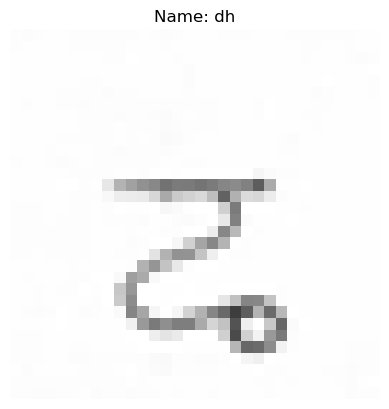

In [6]:
random_index = np.random.randint(0, len(images))
plt.imshow(images[random_index])  # No need to reshape or use grayscale colormap
plt.title(f'Name: {labels[random_index]}')
plt.axis('off')
plt.show()

# Check the distribution of each feature
# feature_counts = np.sum(features, axis=0)
# plt.bar(range(features.shape[1]), feature_counts)
# plt.title('Feature Distribution across the Dataset')
# plt.xlabel('Feature Index')
# plt.ylabel('Frequency')
# plt.show()


# label_counts = np.sum(labels, axis=0)
# plt.figure(figsize=(10, 4))
# plt.bar(range(labels.shape[1]), labels)
# plt.title('Feature Distribution across the Dataset')
# plt.xlabel('Feature Index')
# plt.ylabel('Frequency')
# plt.show()

# print(f'Total number of images: {len(images)}')

